In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np

### Load Dataset

In [5]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 548s 3us/step


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [7]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [16]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

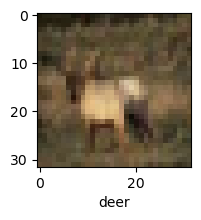

In [19]:
plot_sample(x_train, y_train.flatten(), 3)

### Normalize

In [18]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [21]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])


In [23]:
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.4563 - loss: 1.5472
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.4768 - loss: 1.4821
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.4936 - loss: 1.4404
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.5098 - loss: 1.3996
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.5245 - loss: 1.3577


In [24]:
ann.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4854 - loss: 1.4284


[1.4316774606704712, 0.4828999936580658]

In [25]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.46      0.69      0.56      1000
           1       0.61      0.65      0.63      1000
           2       0.53      0.13      0.20      1000
           3       0.39      0.18      0.25      1000
           4       0.36      0.57      0.44      1000
           5       0.34      0.55      0.42      1000
           6       0.69      0.31      0.43      1000
           7       0.50      0.62      0.55      1000
           8       0.64      0.59      0.61      1000
           9       0.57      0.55      0.56      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.47     10000
weighted avg       0.51      0.48      0.47     10000



## Apply CNN

In [28]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [29]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.3881 - loss: 1.6857
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5915 - loss: 1.1625
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6527 - loss: 0.9989
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6837 - loss: 0.9119
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7095 - loss: 0.8498
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7329 - loss: 0.7775
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7475 - loss: 0.7379
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7582 - loss: 0.6959
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7758 - loss: 0.6521
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7836 - loss: 0.6192


In [31]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6943 - loss: 0.9225


[0.9249384999275208, 0.6969000101089478]

In [32]:
y_pred = cnn.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.73      0.75      1000
           1       0.76      0.87      0.81      1000
           2       0.65      0.54      0.59      1000
           3       0.58      0.41      0.48      1000
           4       0.60      0.66      0.63      1000
           5       0.58      0.60      0.59      1000
           6       0.66      0.85      0.75      1000
           7       0.72      0.75      0.73      1000
           8       0.86      0.74      0.79      1000
           9       0.79      0.80      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000



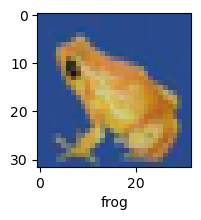

In [38]:
plot_sample(x_test, y_test.flatten(), 1245)


In [39]:
classes[y_pred_classes[1245]]

'frog'